In [208]:
#Importing relevant libraries
import pandas as panda
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

In [209]:
#Reading the .csv file
dataset = panda.read_csv('NAS.csv')
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
5,2003-12-25,NaN,NaN,NaN,NaN,NaN,NaN
6,2003-12-26,NaN,NaN,NaN,NaN,NaN,NaN
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
9,2003-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
#Already in the first ten lines of data, we can already see that we have some missing values. Let's clean that up!
dataset = dataset.dropna()
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
11,2004-01-02,17.940001,18.054300,17.768600,17.768600,17.768600,322923.0
12,2004-01-05,18.054300,18.054300,17.711500,17.711500,17.711500,182782.0
13,2004-01-06,17.940001,17.997101,17.597200,17.597200,17.597200,300054.0
14,2004-01-07,17.425800,17.711500,17.140100,17.140100,17.140100,189937.0


In [211]:
#Much better! Let's now convert the date to a numerical format to make it compatible with our prediction later on.
dataset['Date'] = panda.to_numeric(dataset['Date'].str.replace('-',''))
#Let's also set it as our index!
dataset.index = dataset['Date']
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
20031218,20031218,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
20031219,20031219,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
20031222,20031222,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
20031223,20031223,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
20031229,20031229,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
20031230,20031230,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
20040102,20040102,17.940001,18.054300,17.768600,17.768600,17.768600,322923.0
20040105,20040105,18.054300,18.054300,17.711500,17.711500,17.711500,182782.0
20040106,20040106,17.940001,17.997101,17.597200,17.597200,17.597200,300054.0


In [212]:
#Now, let's focus in on the data we're going to use for our model, being the data and the close value. 
input = dataset['Date']
input.head(10)

Date
20031218    20031218
20031219    20031219
20031222    20031222
20031223    20031223
20031229    20031229
20031230    20031230
20040102    20040102
20040105    20040105
20040106    20040106
20040107    20040107
Name: Date, dtype: int64

In [213]:
close = dataset['Adj Close']
close.head(10)

Date
20031218    19.139799
20031219    18.454201
20031222    18.054300
20031223    17.425800
20031229    17.254400
20031230    17.711500
20040102    17.768600
20040105    17.711500
20040106    17.597200
20040107    17.140100
Name: Adj Close, dtype: float64

In [214]:
#Because we had to delete som null values, our number of entries got a tiny bit skewed.
#We'll fix this by reshaping our array of dates to correspond with the actual number of entries.
inputfix = input.values.reshape(-1, 1)

In [215]:
#Now we can create our linear regression object!
regObj = linear_model.LinearRegression()
regObj.fit(inputfix, close)

LinearRegression()

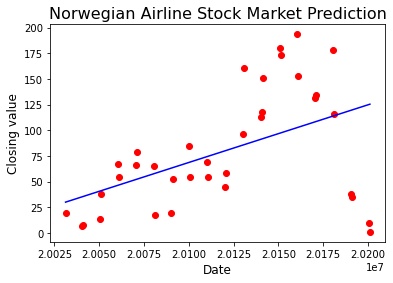

In [216]:
#Let's make it into a pretty graph!
plt.title('Norwegian Airline Stock Market Prediction', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing value', fontsize=12)
#plt.xlim(2002, 2020)
plt.scatter(dataset.Date[::120], dataset.Close[::120], color='red')
plt.plot(dataset.Date, regObj.predict(dataset[['Date']]), color='blue')

In [217]:
#Finally, let's do some prediction with our chosen date!
prediction = regObj.predict([[20150316]])
print('The prediction score for the chosen date is', prediction)

The prediction score for the chosen date is [96.87636511]
